In [ ]:
!git clone https://github.com/facebookresearch/sam2.git
%cd sam2
!pip install -e ".[notebooks]"

Cloning into 'sam2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 128.11 MiB | 31.99 MiB/s, done.
Resolving deltas: 100% (381/381), done.
/content/sam2
Obtaining file:///content/sam2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 4.6

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sam2.sam2_image_predictor import SAM2ImagePredictor
from sam2.build_sam import build_sam2

In [ ]:
#Load checkpoint từ Hugging Face
predictor = SAM2ImagePredictor.from_pretrained("facebook/sam2-hiera-large")

#Kiểm tra thiết bị
device = "cuda" if torch.cuda.is_available() else "cpu"
print (f"Using device: {device}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


sam2_hiera_large.pt:   0%|          | 0.00/898M [00:00<?, ?B/s]

Using device: cuda


Saving hoa1.jpg to hoa1.jpg


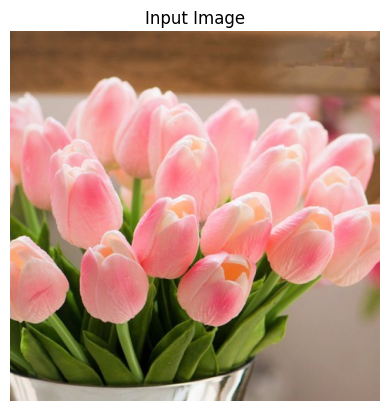

In [ ]:
from google.colab import files

uploaded = files.upload()  # upload ảnh từ máy
image_path = list(uploaded.keys())[0]

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Input Image")
plt.axis("off")
plt.show()

In [ ]:
#prompt
# Ví dụ: 2 điểm (foreground + background)
point_coords = torch.tensor([[300, 400], [100, 150]], dtype=torch.float32)
point_labels = torch.tensor([1, 0], dtype=torch.int64)  # 1=foreground, 0=background

with torch.inference_mode(), torch.autocast(device_type=device if device=="cuda" else "cpu", dtype=torch.bfloat16 if device=="cuda" else torch.float32):
    predictor.set_image(image)
    masks, scores, logits = predictor.predict(
        point_coords=point_coords,
        point_labels=point_labels,
        multimask_output=True
    )

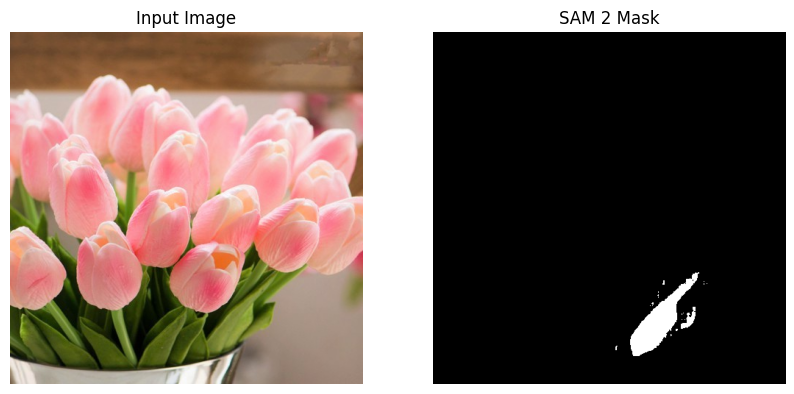

In [ ]:
#Hiển thị mask
# Chọn mask tốt nhất theo score
best_mask = masks[np.argmax(scores)]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Input Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("SAM 2 Mask")
plt.imshow(best_mask, cmap="gray")
plt.axis("off")
plt.show()

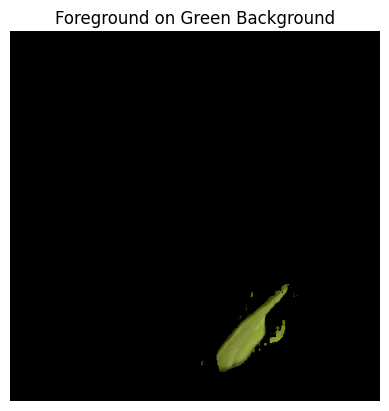

In [ ]:
background_color = [0, 0 , 0]
background = np.zeros_like(image)
background[:] = background_color

# Ghép foreground lên background
composite = background.copy()
composite[best_mask == 1] = image[best_mask == 1]

plt.imshow(composite)
plt.title("Foreground on Green Background")
plt.axis("off")
plt.show()

In [ ]:
# Clone repo
!git clone https://github.com/facebookresearch/segment-anything.git
%cd segment-anything

# Cài PyTorch GPU (Colab thường đã có sẵn)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Cài các thư viện cần thiết
!pip install opencv-python matplotlib scikit-image pandas
!pip install git+https://github.com/facebookresearch/segment-anything.git

Cloning into 'segment-anything'...
remote: Enumerating objects: 304, done.
remote: Total 304 (delta 0), reused 0 (delta 0), pack-reused 304 (from 1)
Receiving objects: 100% (304/304), 18.31 MiB | 21.23 MiB/s, done.
Resolving deltas: 100% (161/161), done.
/content/sam2/segment-anything
Looking in indexes: https://download.pytorch.org/whl/cu118
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-n23lnr_d
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-n23lnr_d
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=69292f7a07902bc8c7734701d415b215a3771ffba0817d89c9170c477310f216
  Stored in directory: /tmp/pip-ephem-wheel-cache-z_7ez2af/wheels/29/82/ff/04e2be9805a1cb

In [ ]:
!mkdir checkpoints
!wget -O checkpoints/sam_vit_h.pth https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2025-12-01 13:54:22--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.225.143.54, 13.225.143.109, 13.225.143.122, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.225.143.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘checkpoints/sam_vit_h.pth’

checkpoints/sam_vit 100%[===================>]   2.39G   186MB/s    in 21s     

2025-12-01 13:54:42 (119 MB/s) - ‘checkpoints/sam_vit_h.pth’ saved [2564550879/2564550879]



In [ ]:
import gradio as gr
from segment_anything import sam_model_registry, SamPredictor
import torch
import cv2
import numpy as np

# Load model
sam_checkpoint = "checkpoints/sam_vit_h.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

# Hàm inference cho Gradio
def segment_image(image, x, y):
    image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
    predictor.set_image(image)
    input_point = np.array([[x, y]])
    input_label = np.array([1])
    masks, scores, _ = predictor.predict(point_coords=input_point,
                                         point_labels=input_label,
                                         multimask_output=True)
    mask = masks[0]
    mask_img = (mask*255).astype(np.uint8)
    return mask_img

# Chạy Gradio interface
iface = gr.Interface(
    fn=segment_image,
    inputs=[gr.Image(type="numpy"), gr.Number(label="X"), gr.Number(label="Y")],
    outputs=gr.Image(type="numpy")
)

iface.launch(share=True)  # share=True để tạo link public Colab

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ec0eb4d36eef8a3b5f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
from segment_anything import sam_model_registry, SamPredictor
import torch
import cv2
import numpy as np

# Load model SAM
sam_checkpoint = "checkpoints/sam_vit_h.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)


# ==========================
# 1) Segment bằng Point
# ==========================
def segment_by_point(image, x, y):
    image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
    predictor.set_image(image)

    input_point = np.array([[x, y]])
    input_label = np.array([1])      # 1 = positive point

    masks, scores, _ = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True
    )
    mask = masks[0]
    return (mask * 255).astype(np.uint8)


# ==========================
# 2) Segment bằng Bounding Box
# ==========================
def segment_by_box(image, x1, y1, x2, y2):
    image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
    predictor.set_image(image)

    box = np.array([x1, y1, x2, y2])

    masks, scores, _ = predictor.predict(
        box=box[None, :],    # shape (1,4)
        multimask_output=True
    )
    mask = masks[0]
    return (mask * 255).astype(np.uint8)


# ==========================
# 3) Auto mask (không cần prompt)
# ==========================
def auto_mask(image):
    image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
    predictor.set_image(image)

    # Lấy embedding → auto-mask
    masks, scores, _ = predictor.predict(
        multimask_output=True
    )

    mask = masks[0]
    return (mask * 255).astype(np.uint8)


# ==========================
# Build UI
# ==========================

with gr.Blocks() as demo:

    gr.Markdown("## 🟦 Segment Anything – Multi Interface")

    with gr.Tabs():

        # Tab 1 — point
        with gr.Tab("🔵 Point Prompt"):
            input_img_1 = gr.Image(type="numpy")
            x_in = gr.Number(label="X")
            y_in = gr.Number(label="Y")
            out_1 = gr.Image(type="numpy")
            btn1 = gr.Button("Segment")
            btn1.click(segment_by_point, inputs=[input_img_1, x_in, y_in], outputs=out_1)

        # Tab 2 — box
        with gr.Tab("🟩 Box Prompt"):
            input_img_2 = gr.Image(type="numpy")
            x1 = gr.Number(label="x1")
            y1 = gr.Number(label="y1")
            x2 = gr.Number(label="x2")
            y2 = gr.Number(label="y2")
            out_2 = gr.Image(type="numpy")
            btn2 = gr.Button("Segment")
            btn2.click(segment_by_box, inputs=[input_img_2, x1, y1, x2, y2], outputs=out_2)

        # Tab 3 — auto-mask
        with gr.Tab("⚙ Auto Mask"):
            input_img_3 = gr.Image(type="numpy")
            out_3 = gr.Image(type="numpy")
            btn3 = gr.Button("Run")
            btn3.click(auto_mask, inputs=input_img_3, outputs=out_3)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7ee370994f43df6f8e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
from segment_anything import sam_model_registry, SamPredictor
import torch
import cv2
import numpy as np

# Load SAM model
sam_checkpoint = "checkpoints/sam_vit_h.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)
predictor = SamPredictor(sam)


def click_and_segment(image, points, labels, point_type, evt: gr.SelectData):
    if image is None:
        return None, points, labels

    x, y = evt.index

    # 1 = POS ; 0 = NEG
    points.append([x, y])
    labels.append(point_type)

    img = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
    predictor.set_image(img)

    pts = np.array(points)
    lbls = np.array(labels)

    masks, _, _ = predictor.predict(
        point_coords=pts,
        point_labels=lbls,
        multimask_output=False
    )

    mask = (masks[0] * 255).astype(np.uint8)
    return mask, points, labels


with gr.Blocks() as demo:
    gr.Markdown("## 🟦 SAM Interactive Segmentation (POS / NEG)")

    points_state = gr.State([])
    labels_state = gr.State([])

    point_type = gr.Radio(
        label="Loại điểm",
        choices=[("Positive", 1), ("Negative", 0)],
        value=("Positive", 1),
        type="value"
    )

    with gr.Row():
        input_img = gr.Image(type="numpy", label="Input Image")
        output_mask = gr.Image(type="numpy", label="Mask Output")

    # Click event
    input_img.select(
        fn=click_and_segment,
        inputs=[input_img, points_state, labels_state, point_type],
        outputs=[output_mask, points_state, labels_state],
    )

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://df24502dbc2b9fddd6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
from segment_anything import sam_model_registry, SamPredictor
import torch
import cv2
import numpy as np

# Load SAM model
sam_checkpoint = "checkpoints/sam_vit_h.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)
predictor = SamPredictor(sam)


def click_and_segment(image, points, labels, point_type, evt: gr.SelectData):
    """
    Thực hiện phân đoạn SAM dựa trên điểm click, giữ lại vùng được segment và làm đen phần còn lại.
    """
    if image is None:
        return None, points, labels

    x, y = evt.index

    # Cập nhật danh sách điểm click và nhãn (1: Positive, 0: Negative)
    points.append([x, y])
    labels.append(point_type)

    # Gradio Image (type="numpy") là RGB. cv2 và SAM predictor cần BGR.
    img_bgr = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    predictor.set_image(img_bgr)

    pts = np.array(points)
    lbls = np.array(labels)

    # Dự đoán mask
    masks, _, _ = predictor.predict(
        point_coords=pts,
        point_labels=lbls,
        multimask_output=False
    )

    mask = masks[0] # Mask boolean (True/False)

    # -----------------------------------------------------
    # Logic: Giữ Foreground (Vùng mask), Đen Background
    # -----------------------------------------------------

    # 1. Tạo một ảnh đen hoàn toàn có cùng kích thước với ảnh gốc.
    extracted_image = np.zeros_like(img_bgr, dtype=np.uint8)

    # 2. Gán các pixel của ảnh gốc vào vị trí tương ứng trong ảnh đen
    # nơi mask là True.
    extracted_image[mask] = img_bgr[mask]

    # Chuyển đổi từ BGR sang RGB để hiển thị đúng trong Gradio
    extracted_image_rgb = cv2.cvtColor(extracted_image, cv2.COLOR_BGR2RGB)

    # -----------------------------------------------------

    # 3. (Tùy chọn) Vẽ các điểm đã click lên ảnh để người dùng dễ hình dung
    # Ta vẽ lên ảnh RGB đã được tách nền
    for p, l in zip(points, labels):
        color = (0, 255, 0) if l == 1 else (255, 0, 0) # Xanh lá cho POS, Đỏ cho NEG
        cv2.circle(extracted_image_rgb, (p[0], p[1]), radius=5, color=color, thickness=-1)

    # Trả về ảnh đã được tách nền
    return extracted_image_rgb, points, labels


# -----------------------------------------------------
# Giao diện Gradio (giữ nguyên)
# -----------------------------------------------------

with gr.Blocks() as demo:
    gr.Markdown("## 🟦 SAM Interactive Segmentation (POS / NEG) - Foreground Extraction")

    points_state = gr.State([]) # Lưu tọa độ điểm
    labels_state = gr.State([]) # Lưu nhãn điểm (1 hoặc 0)

    with gr.Row():
        gr.Markdown("### 1. Chọn Loại Điểm")
        gr.Markdown("### 2. Tải Ảnh và Click")

    point_type = gr.Radio(
        label="Loại điểm",
        choices=[("Positive (Đối tượng)", 1), ("Negative (Nền/Vùng Loại bỏ)", 0)],
        value=1, # Giá trị mặc định là 1 (Positive)
        type="value"
    )

    with gr.Row():
        input_img = gr.Image(type="numpy", label="Input Image (Click để Segment)")
        output_image = gr.Image(type="numpy", label="Ảnh Đã Tách Nền (Foreground Only)")

    with gr.Row():
        reset_btn = gr.Button("Reset Điểm & Ảnh")

        def reset_all():
            return None, [], []

        reset_btn.click(
            fn=reset_all,
            inputs=[],
            outputs=[output_image, points_state, labels_state]
        )

    # Click event
    input_img.select(
        fn=click_and_segment,
        inputs=[input_img, points_state, labels_state, point_type],
        outputs=[output_image, points_state, labels_state],
    )

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://69c6d6c05c6956d579.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
